In [1]:
import albumentations as A

In [2]:
import pandas as pd
import numpy as np

In [3]:
import cv2
import random

In [30]:
import numpy as np
import cv2

def add_noise(image, noise_type, sigma=0.1):
    if noise_type == "gauss":
        row, col, ch = image.shape
        mean = 0
        gauss = np.random.normal(mean, sigma, (row, col, ch))
        gauss = gauss.reshape(row, col, ch)
        noisy_image = image + gauss
        return noisy_image
    elif noise_type == "s&p":
        row, col, ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                  for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount * image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                  for i in image.shape]
        out[coords] = 0
        return out
    elif noise_type == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_type == "speckle":
        row, col, ch = image.shape
        gauss = np.random.randn(row, col, ch)
        gauss = gauss.reshape(row, col, ch)
        noisy = image + image * gauss
        return noisy
    else:
        return image

In [5]:
path = "../data/tests"

In [16]:
#read image
image = cv2.imread('Aaron_Eckhart_0001.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

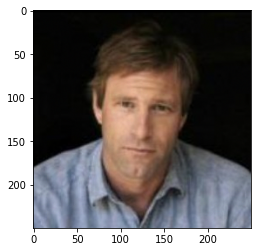

In [36]:
from matplotlib import pyplot as plt
noisy_image = add_noise(image, "gauss",  0.5)

plt.imshow(noisy_image/255)
# cv2.imwrite("noise.jpg", noisy_image)
# save the image using another library (PIL)
from PIL import Image
transformed_image = Image.fromarray((noisy_image).astype(np.uint8))
transformed_image.save("noise.jpg", dpi=(600,600), quality=100, subsampling=0)

In [ ]:
transform = A.HorizontalFlip(p=0.5)
random.seed(7)
augmented_image = transform(image=image)['image']
cv2.imwrite("../data/tests/f1/res.jpg", augmented_image)

In [ ]:
rotation_trf = A.Affine(rotate=[90, 90], p=1, mode=cv2.BORDER_CONSTANT, fit_output=True)
rotated_img = rotation_trf(image=image)['image']
cv2.imwrite("../data/tests/f1/rotation.jpg", rotated_img)

In [ ]:
affine_trf = A.Affine(always_apply=False, p=1.0, cval = 128)
affined_img = affine_trf(image=image)['image']
cv2.imwrite("../data/tests/f1/affine.jpg", affined_img)

In [ ]:
brightness_trf = A.ColorJitter(always_apply=False, p=1.0, brightness=0.8)
br_img = brightness_trf(image=image)['image']
cv2.imwrite("../data/tests/f1/brightness.jpg", br_img)

In [ ]:
contrast_trf = A.ColorJitter(always_apply=False, p=1.0, contrast=0.8)
cr_img = contrast_trf(image=image)['image']
cv2.imwrite("../data/tests/f1/contrast.jpg", cr_img)

In [ ]:
br_ctr = A.ColorJitter(always_apply=False, p=1.0, contrast=0.5,brightness=0.5)
br_ctr_img = br_ctr(image=image)['image']
cv2.imwrite("../data/tests/f1/contrast_brightness.jpg", br_ctr_img)

In [ ]:
DS = A.Downscale(always_apply=False, p=1.0, scale_min=0.62, scale_max=0.74)
ds_img = br_ctr(image=image)['image']
cv2.imwrite("../data/tests/f1/ds.jpg", ds_img)

##  fouiller les dossiers

In [ ]:
import os

In [ ]:
data_path = "../data/01_raw/lfw"

In [ ]:
subfolders = [f.path for f in os.scandir(data_path) if f.is_dir()]

In [ ]:
subfolders[0:10]

In [ ]:
for f in subfolders:
    print(f)

In [ ]:
images = [i.path for i in os.scandir(subfolders[9]) if i.is_file()]

In [ ]:
images

## data augmentation

In [ ]:
"text"+str(1)

In [ ]:
img = images[0]
img.split('/')[-1].split('.')[0]

In [ ]:
import numpy as np

In [ ]:
df =[['file','person']]
df

In [ ]:
df.append(['test','test2'])
result = np.array(df)
result

In [ ]:
pd.DataFrame(result, columns = ['file','person'])
